In [1]:
import pandas as pd
import torch

/home/ec2-user/SageMaker/custom-miniconda/miniconda/envs/splade-ready/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:
full_collection = pd.read_table('data/toy_data/full_collection/raw.tsv', sep='\t', header=None)

In [32]:
len(full_collection)

8519

In [21]:
full_collection[1][0]

'The presence of communication amid scientific minds was equally important to the success of the Manhattan Project as scientific intellect was. The only cloud hanging over the impressive achievement of the atomic researchers and engineers is what their success truly meant; hundreds of thousands of innocent lives obliterated.'

In [9]:
from transformers import AutoModelForSequenceClassification, TFAutoModelForSequenceClassification
from transformers import AutoTokenizer
import numpy as np
from scipy.special import expit

/home/ec2-user/SageMaker/custom-miniconda/miniconda/envs/splade-ready/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
MODEL = f"cardiffnlp/tweet-topic-21-multi"
tokenizer = AutoTokenizer.from_pretrained(MODEL)

# PT
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
class_mapping = model.config.id2label

text = list(full_collection[1])

Downloading: 100%|██████████| 1.27k/1.27k [00:00<00:00, 537kB/s]
Downloading: 100%|██████████| 780k/780k [00:00<00:00, 2.47MB/s]
Downloading: 100%|██████████| 446k/446k [00:00<00:00, 1.48MB/s]
Downloading: 100%|██████████| 1.29M/1.29M [00:00<00:00, 3.09MB/s]
Downloading: 100%|██████████| 239/239 [00:00<00:00, 166kB/s]
Downloading: 100%|██████████| 1.84k/1.84k [00:00<00:00, 457kB/s]
Downloading: 100%|██████████| 476M/476M [00:24<00:00, 20.7MB/s] 


NameError: name 'full_collection' is not defined

In [13]:
class_mapping

{0: 'arts_&_culture',
 1: 'business_&_entrepreneurs',
 2: 'celebrity_&_pop_culture',
 3: 'diaries_&_daily_life',
 4: 'family',
 5: 'fashion_&_style',
 6: 'film_tv_&_video',
 7: 'fitness_&_health',
 8: 'food_&_dining',
 9: 'gaming',
 10: 'learning_&_educational',
 11: 'music',
 12: 'news_&_social_concern',
 13: 'other_hobbies',
 14: 'relationships',
 15: 'science_&_technology',
 16: 'sports',
 17: 'travel_&_adventure',
 18: 'youth_&_student_life'}

In [48]:
len(text[1])

311

In [67]:
#tokens = tokenizer(text[0:10], truncation=True, max_length=512, return_tensors='pt')
tokens = tokenizer(text[0:10], truncation=True, max_length=512, padding='max_length', return_tensors='pt')

In [68]:
tokens

{'input_ids': tensor([[    0,   133,  2621,  ...,     1,     1,     1],
        [    0,  1106,     5,  ...,     1,     1,     1],
        [    0,   133,   129,  ...,     1,     1,     1],
        ...,
        [    0,   133,  2136,  ...,     1,     1,     1],
        [    0, 33295, 17444,  ...,     1,     1,     1],
        [    0,  6179,  7840,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [69]:
output = model(**tokens)

scores = output[0][0].detach().numpy()
scores = expit(scores)
print(scores)
print(sum(scores))

[0.01264997 0.04049299 0.01736691 0.03581383 0.00802592 0.00493251
 0.01345491 0.01676077 0.00823048 0.0103578  0.2774843  0.01549087
 0.33673996 0.02477628 0.00906948 0.8390681  0.03405136 0.02357959
 0.06382543]
1.792171472683549


In [74]:
output[0].detach().numpy().shape

(10, 19)

In [77]:
!export PYTHONPATH=$PYTHONPATH:$(pwd)

In [4]:
from splade.datasets.datasets import CollectionDatasetPreLoad
d_collection = CollectionDatasetPreLoad(data_dir='data/toy_data/full_collection/', id_style="row_id")

Preloading dataset


8519it [00:00, 202645.56it/s]


In [5]:
passages = []
for i in range(len(d_collection)):
    passages.append(d_collection[i][1])

In [6]:
len(passages)

8519

In [15]:
MODEL = f"cardiffnlp/tweet-topic-21-multi"
tokenizer = AutoTokenizer.from_pretrained(MODEL)

# PT
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
tokens = tokenizer(passages[:20], truncation=True, max_length=512, padding='max_length', return_tensors='pt')

output = model(**tokens)


In [8]:
tokens

{'input_ids': tensor([[    0,   133,  2621,  ...,     1,     1,     1],
        [    0,  1106,     5,  ...,     1,     1,     1],
        [    0,   133,   129,  ...,     1,     1,     1],
        ...,
        [    0,  9344, 30300,  ...,     1,     1,     1],
        [    0,   250,  3723,  ...,     1,     1,     1],
        [    0,  1779,    16,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [20]:
batch_1 = output[0].detach().numpy()
batch_2 = output[0].detach().numpy()

In [18]:
import h5py

In [24]:
np.vstack([batch_1, batch_2]).shape

(40, 19)

In [27]:
empty = np.empty(shape=(0, 19))

In [28]:
np.vstack([empty, batch_1]).shape

(20, 19)

In [1]:
a = [12,3,4]
a[0:2]

[12, 3]

In [7]:
batch_size = 10
arr = range(100)
for i in range(5):
    print(f"indexing batch {i}")
    start = i * batch_size
    end = (i +1) * batch_size
    print(start, end)
    print(list(arr[start:end]))
    print("-=-------------", len(list(arr[start:end])))


indexing batch 0
0 10
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
-=------------- 10
indexing batch 1
10 20
[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
-=------------- 10
indexing batch 2
20 30
[20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
-=------------- 10
indexing batch 3
30 40
[30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
-=------------- 10
indexing batch 4
40 50
[40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
-=------------- 10


In [2]:
#==========================================
# Reading the generated topics back

In [39]:
raw_classifications = pd.read_csv('data/toy_data/full_collection/full_collection_classifications.csv')

In [40]:
raw_classifications.head()

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0,-4.357370,-3.165291,-4.035669,-3.292950,-4.817021,-5.306963,-4.294865,-4.071812,-4.791646,-4.559603,-0.956975,-4.151893,-0.677856,-3.672780,-4.693730,1.651311,-3.345241,-3.723512,-2.685650
1,1,-4.495866,-4.518273,-4.568266,-0.242958,-4.140872,-4.882246,-5.725925,1.625383,-4.964516,-4.825768,-3.852815,-4.164156,-0.899610,-3.663375,-3.618675,-3.317337,-2.251630,-4.213649,-4.260256
2,2,-3.651329,-4.368081,-4.259689,-0.130951,-4.593590,-5.185289,-6.261438,0.130258,-4.924407,-5.481863,-2.389743,-4.309179,-1.538690,-2.784120,-3.888411,-3.289715,-3.816337,-3.866705,-3.788431
3,3,-2.969216,-3.109171,-0.553384,0.832794,-0.267655,-3.797642,-0.608121,-4.625715,-4.904062,-4.774277,-4.478104,-3.840984,-2.616863,-3.443625,1.923264,-4.327539,-4.288401,-3.946356,-4.115621
4,4,-3.133940,-4.801567,-4.346203,-2.270239,-6.063247,-6.246601,-3.909956,-4.855967,-5.146725,-5.142206,-2.564400,-4.229722,1.517462,-2.321126,-5.701975,-0.425106,-6.360362,-3.214725,-4.315653


In [10]:
transformed = expit(raw_classifications.drop('Unnamed: 0', axis=1))

In [15]:
import h5py

In [12]:
h5f = h5py.File('data/toy_data/full_collection/full_collection_classifications.h5', 'w')
h5f.create_dataset('classifications', data=transformed)


<HDF5 dataset "classifications": shape (8519, 19), type "<f8">

In [13]:
h5f.close()

In [11]:
transformed

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.012650,0.040493,0.017367,0.035814,0.008026,0.004933,0.013455,0.016761,0.008230,0.010358,0.277484,0.015491,0.336740,0.024776,0.009069,0.839068,0.034051,0.023580,0.063825
1,0.011032,0.010790,0.010269,0.439557,0.015660,0.007523,0.003250,0.835536,0.006933,0.007957,0.020779,0.015305,0.289131,0.025005,0.026118,0.034981,0.095209,0.014577,0.013922
2,0.025300,0.012517,0.013930,0.467309,0.010015,0.005567,0.001905,0.532519,0.007215,0.004144,0.083958,0.013266,0.176726,0.058188,0.020067,0.035926,0.021534,0.020498,0.022130
3,0.048836,0.042731,0.365080,0.696945,0.433483,0.021932,0.352488,0.009702,0.007362,0.008373,0.011227,0.021021,0.068061,0.030960,0.872502,0.013028,0.013541,0.018959,0.016054
4,0.041729,0.008150,0.012790,0.093618,0.002321,0.001933,0.019648,0.007722,0.005785,0.005811,0.071465,0.014348,0.820164,0.089388,0.003328,0.395296,0.001726,0.038615,0.013182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8514,0.018570,0.023601,0.024584,0.308266,0.021198,0.026238,0.015962,0.951278,0.012827,0.010881,0.061318,0.021223,0.135187,0.024498,0.033009,0.125557,0.051803,0.022236,0.030976
8515,0.041156,0.946442,0.027758,0.027268,0.014026,0.028558,0.023701,0.014513,0.118455,0.010726,0.050055,0.014675,0.249699,0.141380,0.006701,0.086216,0.013070,0.017623,0.007791
8516,0.011726,0.393342,0.005655,0.063899,0.004542,0.002648,0.025962,0.001422,0.003503,0.003749,0.022637,0.003397,0.741458,0.046839,0.003412,0.023706,0.003356,0.021852,0.006453
8517,0.086973,0.006002,0.008456,0.639313,0.006649,0.001671,0.008849,0.008900,0.044273,0.004069,0.030608,0.005401,0.757273,0.118515,0.006082,0.018219,0.001944,0.052432,0.009891


In [35]:
clipped = transformed.applymap(lambda x: x if x >= 0.1 else 0.0)

In [16]:
sum(clipped.sum(axis=1) - transformed.sum(axis=1)) / 8519

-0.034390170666076296

(array([2.333e+03, 2.661e+03, 2.159e+03, 9.780e+02, 2.770e+02, 8.300e+01,
        1.900e+01, 5.000e+00, 2.000e+00, 2.000e+00]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <BarContainer object of 10 artists>)

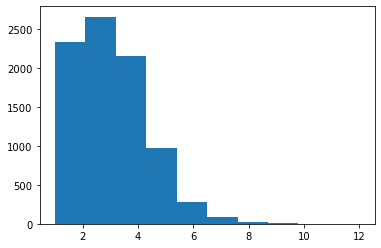

In [26]:
import matplotlib.pyplot as plt
clipped_test = transformed.applymap(lambda x: 1 if x >= 0.1 else 0)
plt.hist(clipped_test.sum(axis=1))

In [50]:
import h5py
ti = h5py.File('data/toy_data/full_collection/full_collection_classifications.h5', 'r')

# import pandas as pd
# pd.read_hdf('data/toy_data/full_collection/full_collection_classifications.h5','classifications')

In [51]:
passage_topics = ti['classifications'][()]

In [65]:
passage_topics[0]

array([0.01264997, 0.04049299, 0.01736691, 0.03581383, 0.00802592,
       0.00493251, 0.01345491, 0.01676077, 0.00823048, 0.0103578 ,
       0.27748431, 0.01549087, 0.33673996, 0.02477628, 0.00906948,
       0.83906816, 0.03405136, 0.02357959, 0.06382543])

In [61]:
np.vectorize(lambda x: x if x >= 0.1 else 0)(passage_topics)[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [64]:
((passage_topics > 0.1) * passage_topics)[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.27748431, 0.        , 0.33673996, 0.        , 0.        ,
       0.83906816, 0.        , 0.        , 0.        ])

In [22]:
q_scores = np.array([0.07597718, 0.01711285, 0.05108863, 0.5699259,  0.06548463, 0.01914789,
 0.00900588, 0.92829484, 0.03917756, 0.0087556,  0.07699114, 0.0458726,
 0.6636871, 0.06013811, 0.07245751, 0.02525434, 0.00514808, 0.01997422,
 0.05147067])

In [23]:
q_scores

array([0.07597718, 0.01711285, 0.05108863, 0.5699259 , 0.06548463,
       0.01914789, 0.00900588, 0.92829484, 0.03917756, 0.0087556 ,
       0.07699114, 0.0458726 , 0.6636871 , 0.06013811, 0.07245751,
       0.02525434, 0.00514808, 0.01997422, 0.05147067])

In [29]:
q_scores_clipped = np.array([q if q >0.1 else 0.0 for q in q_scores])

In [30]:
q_scores_clipped

array([0.        , 0.        , 0.        , 0.5699259 , 0.        ,
       0.        , 0.        , 0.92829484, 0.        , 0.        ,
       0.        , 0.        , 0.6636871 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [37]:
len([x for x in list(clipped @ q_scores_clipped) if x == 0.0])

817

In [38]:
clipped @ q_scores_clipped

0       0.223490
1       1.218031
2       0.877956
3       0.397207
4       0.544333
          ...   
8514    1.148477
8515    0.165722
8516    0.492096
8517    0.866953
8518    0.532637
Length: 8519, dtype: float64

In [43]:
passages = pd.read_table('data/toy_data/full_collection/raw.tsv', header=None)

In [1]:
import time

In [3]:
start = time.time()

In [4]:
start

1678518624.1217747

In [5]:
time.time()

1678518636.5154994

In [3]:
# query classifications
import pandas as pd

In [4]:
raw_q_classifications = pd.read_csv('data/toy_data/dev_queries/query_classifications.csv')

In [7]:
raw_q_classifications.shape

(1600, 20)

In [10]:
q_transformed = expit(raw_q_classifications.drop('Unnamed: 0', axis=1))
import h5py
q_h5f = h5py.File('data/toy_data/dev_queries/query_classifications.h5', 'w')
q_h5f.create_dataset('classifications', data=q_transformed)
q_h5f.close()
